In [11]:
import numpy as np
from sklearn.base import ClassifierMixin
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split



In [12]:
def train_test()->None:
    "traing a sklearn digit classifier"
    digits = load_digits()
    data = digits.images.reshape((len(digits.images), -1))
    xtrain, xtest, ytrain, ytest = train_test_split(data, digits.target, test_size= 0.2, shuffle=False)
    model = SVC(gamma=0.001)
    model.fit(xtrain, ytrain)
    test_acc = model.score(xtest, ytest)
    print(f"the test accuracy is : {test_acc}")

train_test()

the test accuracy is : 0.9583333333333334


![Screenshot 2024-07-05 at 11.53.12 PM.png](<attachment:Screenshot 2024-07-05 at 11.53.12 PM.png>)

![Screenshot 2024-07-05 at 11.53.58 PM.png](<attachment:Screenshot 2024-07-05 at 11.53.58 PM.png>)
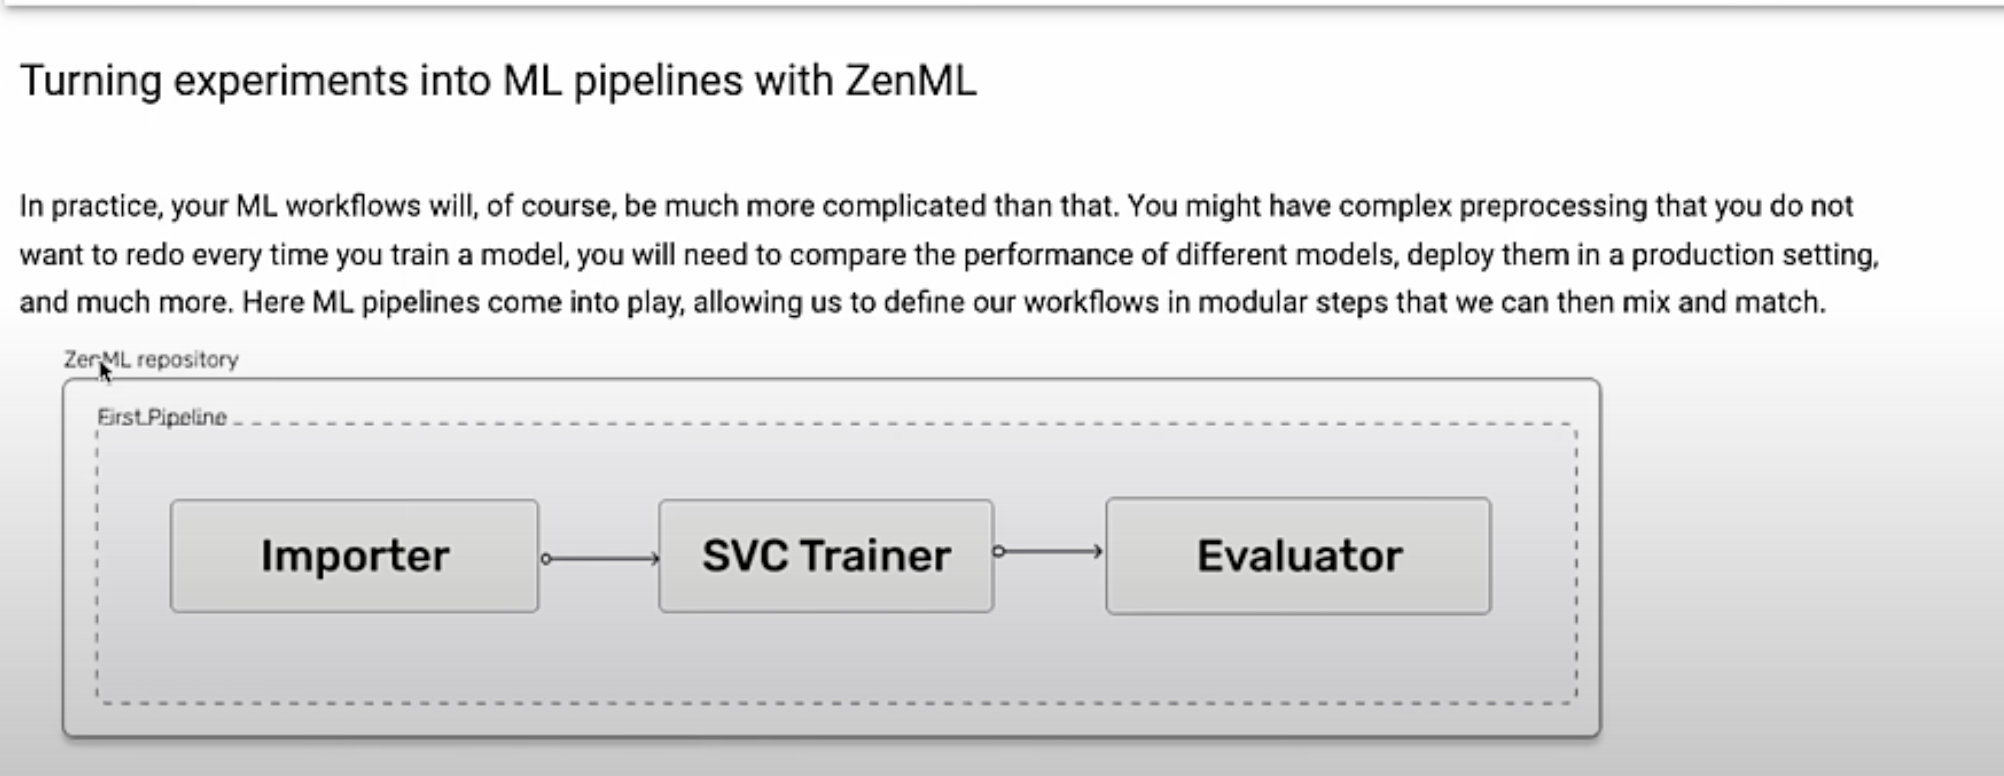
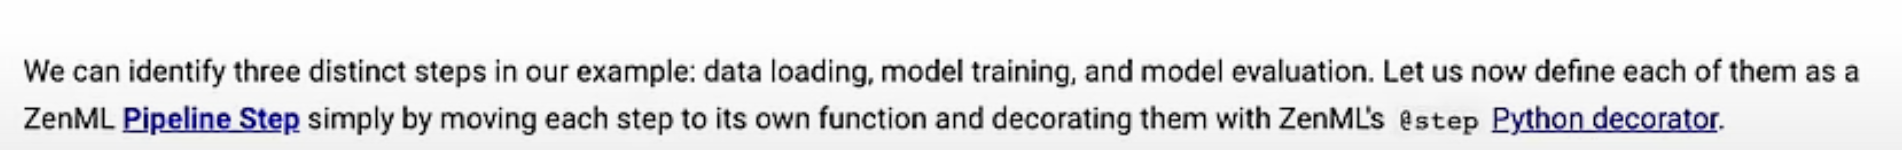

In [13]:
from zenml import step
from typing_extensions import Annotated
import pandas as pd
from typing import Tuple

@step
def importer() -> Tuple[
    Annotated[np.ndarray,"x_train" ],
    Annotated[np.ndarray, "x_test"],
    Annotated[np.ndarray, "y_train"],
    Annotated[np.ndarray, "y_test"]
]:
    "loading the digits dataset as numpy array"
    digits = load_digits()
    data = digits.images.reshape((len(digits.images), -1))
    x_train, x_test, y_train, y_test = train_test_split(
        data,  digits.target, test_size=0.2, shuffle=False
    )
    return x_train, x_test, y_train, y_test

@step 
def svcTrainer(
    x_train: np.ndarray,
    y_train: np.ndarray
) -> ClassifierMixin:
    "train an sklearn classifier"
    model = SVC(gamma=0.001)
    model.fit(x_train,y_train)
    return model


@step 
def evaluate(
 x_test: np.ndarray,
 y_test: np.ndarray,
 model: ClassifierMixin
) -> float:
    "calculate the test set accuracy of an sklearn model"
    test_acc = model.score(x_test, y_test)
    print(f"Test Accuracy : {test_acc}")
    return test_acc

![Screenshot 2024-07-06 at 10.20.49 AM.png](<attachment:Screenshot 2024-07-06 at 10.20.49 AM.png>)
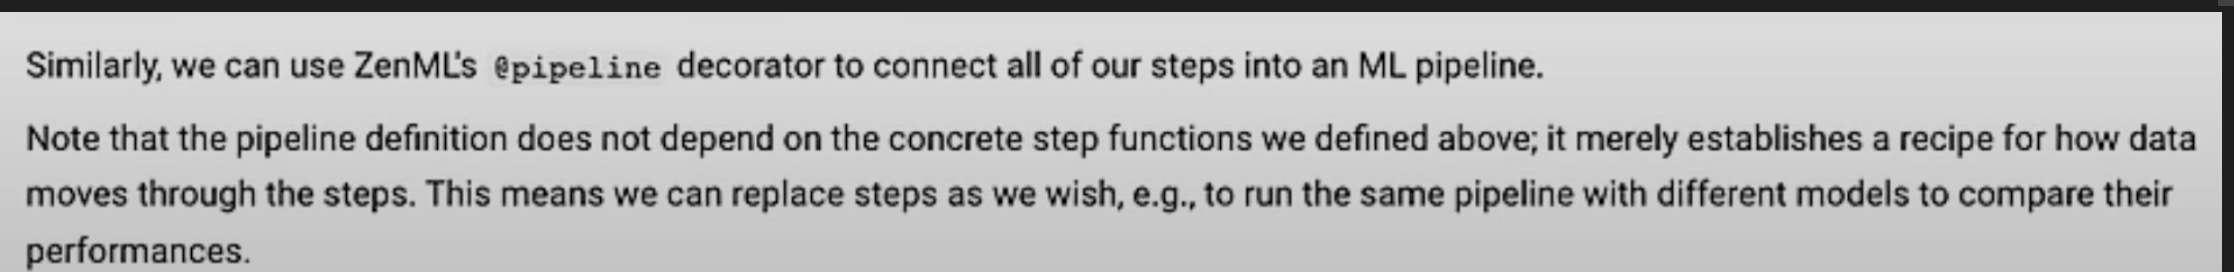

In [14]:
from zenml import pipeline

@pipeline
def digits_pipeline():
    "linking all the steps into single pipeline"
    x_train, x_test, y_train, y_test = importer()
    model = svcTrainer(x_train = x_train , y_train=y_train)
    evaluate(x_test=x_test, y_test=y_test, model=model)

![Screenshot 2024-07-06 at 12.08.18 AM.png](<attachment:Screenshot 2024-07-06 at 12.08.18 AM.png>)
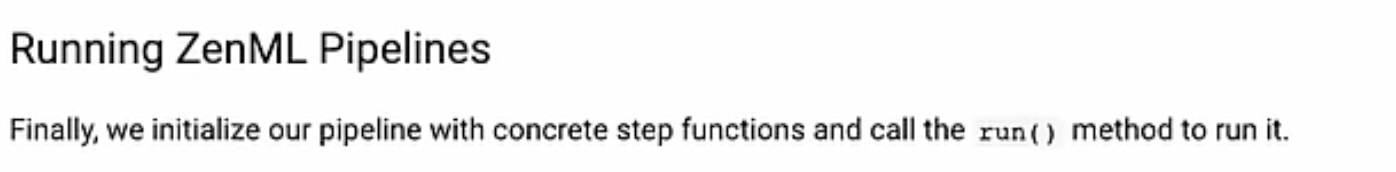

In [15]:
digit_svm_pipeline = digits_pipeline()


Initiating a new run for the pipeline: digits_pipeline.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 digit_svm_pipeline = digits_pipeline()                                                       │
│   2                                                                                              │
│                                                                                                  │
│ /opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/zenml/new/pipelines/pipeline.py:141 │
│ 0 in __call__                                                                                    │
│                                                                                                  │
│   1407 │   │   │   return self.entrypoint(*args, **kwargs)                                       │
│   1408 │   │                                                                                     │
│   1409 │   │   self.prepare(*args, **kwargs)                                                     │
│ ❱ 1410 │   │   return self._run(**self._run_args)                                                │
│   1411 │                                                                                         │
│   1412 │   def _call_entrypoint(self, *args: Any, **kwargs: Any) -> None:                        │
│   1413 │   │   """Calls the pipeline entrypoint function with the given arguments.               │
│                                                                                                  │
│ /opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/zenml/new/pipelines/pipeline.py:626 │
│ in _run                                                                                          │
│                                                                                                  │
│    623 │   │   logger.info(f"Initiating a new run for the pipeline: `{self.name}`.")             │
│    624 │   │                                                                                     │
│    625 │   │   with track_handler(AnalyticsEvent.RUN_PIPELINE) as analytics_handler:             │
│ ❱  626 │   │   │   deployment, pipeline_spec, schedule, build = self._compile(                   │
│    627 │   │   │   │   config_path=config_path,                                                  │
│    628 │   │   │   │   run_name=run_name,                                                        │
│    629 │   │   │   │   enable_cache=enable_cache,                                                │
│                                                                                                  │
│ /opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/zenml/new/pipelines/pipeline.py:102 │
│ 4 in _compile                                                                                    │
│                                                                                                  │
│   1021 │   │                                                                                     │
│   1022 │   │   deployment, pipeline_spec = Compiler().compile(                                   │
│   1023 │   │   │   pipeline=self,                                                                │
│ ❱ 1024 │   │   │   stack=Client().active_stack,                                                  │
│   1025 │   │   │   run_configuration=run_config,                                                 │
│   1026 │   │   )                                                                                 │
│   1027                                                                                           │
│                                                                                                  │
│ /opt/miniconda3/envs/tensorflow/lib/python3.10/site-package

![Screenshot 2024-07-06 at 10.07.39 AM.png](<attachment:Screenshot 2024-07-06 at 10.07.39 AM.png>)
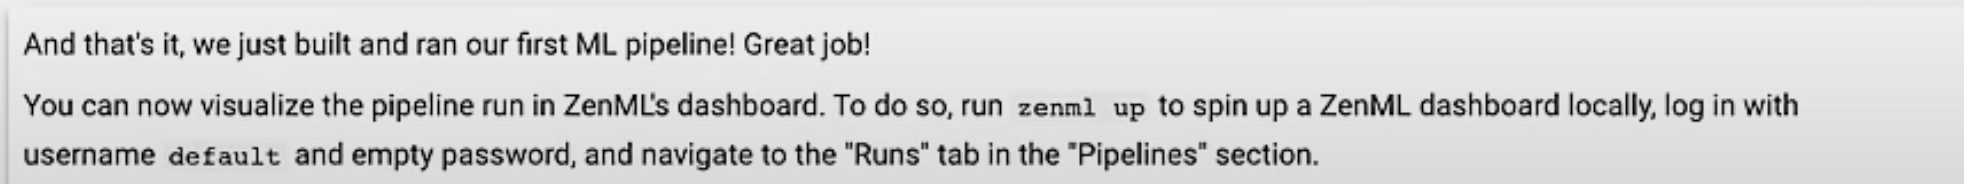